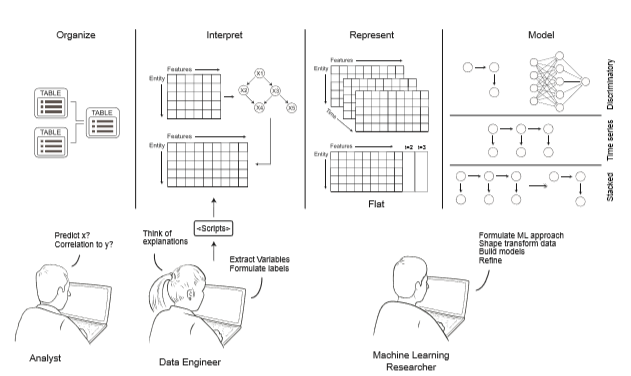

In [1]:
from IPython.display import Image
Image(filename=r'特征工程1.png', width=600) 

#### 业务建模流程

* 将业务抽象为分类or回归问题
* 定义标签，得到y
* 选取合适的样本，并匹配出全部的信息作为特征的来源
* 特征工程 + 模型训练 + 模型评价与调优（相互之间可能会有交互）
* 输出模型报告
* 上线与监控

#### 什么是特征？  
在机器学习的背景下，特征是用来解释现象发生的单个特性或一组特性。 当这些特性转换为某种可度量的形式时，它们被称为特征。

举个例子，假设你有一个学生列表，这个列表里包含每个学生的姓名、学习小时数、IQ和之前考试的总分数。现在，有一个新学生，你知道他/她的学习小时数和IQ，但他/她的考试分数缺失，你需要估算他/她可能获得的考试分数。

在这里，你需要用IQ和study_hours构建一个估算分数缺失值的预测模型。所以，IQ和study_hours就成了这个模型的特征。

#### 特征工程可能包含的内容

* 基础特征构造  
* 数据预处理  
* 特征衍生  
* 特征变换  
* 特征筛选  

这是一个完整的特征工程流程，但不是唯一的流程，每个过程都有可能会交换顺序，随着学习的加深，大家会慢慢体会到。

### 预览数据

In [2]:
# import 工具库
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   label        891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,label,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


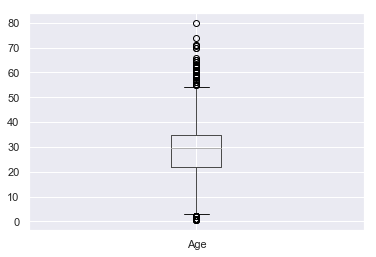

In [36]:
#变量的百分位以及离群点
#事实上不做这种分析也没关系，从最终的模型角度来筛选，会大大减少工作量
%matplotlib inline
df_train.boxplot(column='Age')

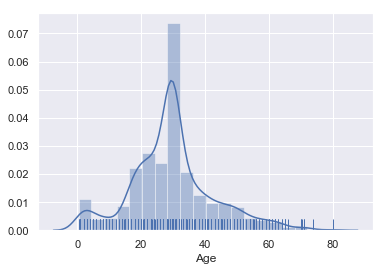

In [37]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.distplot(df_train.Age, kde=True, bins=20, rug=True)

In [38]:
#判断一下y有几类
df_train.label.unique()

array([0, 1])

In [10]:
pip install pyecharts

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pyecharts as pd

print(pd.__version__)

1.9.1


In [ ]:
#pip install pyecharts==1.9.1

In [46]:
import random
import pyecharts.options as opts
from pyecharts.charts import Bar3D

hours = ["12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a", "12p", "1p", "2p", "3p", "4p", "5p",
         "6p", "7p", "8p", "9p", "10p", "11p", ]
days = ["Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"]

data = [(i, j, random.randint(0, 12)) for i in range(6) for j in range(24)]
data = [[d[1], d[0], d[2]] for d in data]

res = (
    Bar3D(init_opts=opts.InitOpts(width="900px", height="600px")).add(
        series_name="",
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=hours),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=days),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    ).set_global_opts(
        title_opts=opts.TitleOpts("标准3D柱状图"),
        visualmap_opts=opts.VisualMapOpts(
            max_=20,
            range_color=[
                "#313695", "#4575b4", "#74add1", "#abd9e9", "#e0f3f8", "#ffffbf", "#fee090", "#fdae61", "#f46d43",
                "#d73027", "#a50026",
            ],
        )
    )
)
res.render_notebook()

### 1、数据预处理：缺失值
* pandas fillna
* sklearn Imputer

In [47]:
df_train['Age'].sample(10)

29     29.699118
7       2.000000
56     21.000000
125    12.000000
645    48.000000
320    22.000000
604    35.000000
748    19.000000
112    22.000000
519    32.000000
Name: Age, dtype: float64

In [48]:
df_train['Age'].fillna(value=df_train['Age'].mean()).sample(10)

115    21.000000
372    19.000000
771    48.000000
379    19.000000
855    18.000000
231    29.000000
641    24.000000
854    44.000000
303    29.699118
0      22.000000
Name: Age, dtype: float64

In [49]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

age = imp.fit_transform(df_train[['Age']].values).copy()
df_train.loc[:,'Age'] = df_train['Age'].fillna(value=df_train['Age'].mean()).copy()
df_train.head(10)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3.555348
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,3.391117
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,3.988984
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0.693147
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3.295837
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2.639057


### 数值型

#### 数值缩放

In [50]:
# 取对数等变换
import numpy as np
log_age = df_train['Age'].apply(lambda x:np.log(x))
df_train.loc[:,'log_age'] = log_age
df_train.head(10)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3.555348
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,3.391117
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,3.988984
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0.693147
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3.295837
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2.639057


In [51]:
# 幅度缩放，最大最小值缩放到[0,1]区间内
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
fare_trans = mm_scaler.fit_transform(df_train[['Fare']])

In [52]:
# 幅度缩放，将每一列的数据标准化为正态分布的
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fare_std_trans = std_scaler.fit_transform(df_train[['Fare']])

In [53]:
#中位数或者四分位数去中心化数据，对异常值不敏感
from sklearn.preprocessing import robust_scale
fare_robust_trans = robust_scale(df_train[['Fare','Age']])

In [54]:
#将同一行数据规范化,前面的同一变为1以内也可以达到这样的效果
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
fare_normal_trans = normalizer.fit_transform(df_train[['Age','Fare']])
fare_normal_trans

array([[0.94975704, 0.31298812],
       [0.47041706, 0.88244422],
       [0.95655127, 0.29156418],
       ...,
       [0.78483999, 0.61969847],
       [0.65493054, 0.75568908],
       [0.97190276, 0.2353827 ]])

#### 统计值

In [55]:
# 最大最小值
max_age = df_train['Age'].max()
min_age = df_train["Age"].min()

In [56]:
# 分位数,极值处理，我们最粗暴的方法就是将前后1%的值抹去
age_quarter_01 = df_train['Age'].quantile(0.01)
print(age_quarter_01)
age_quarter_99 = df_train['Age'].quantile(0.99)
print(age_quarter_99)

1.0
65.0


In [57]:
#### 四则运算
df_train.loc[:,'family_size'] = df_train['SibSp']+df_train['Parch']+1
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1


In [58]:
df_train.loc[:,'tmp'] = df_train['Age']*df_train['Pclass'] + 4*df_train['family_size']
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
df_train[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [63]:
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

a^0 * b^0 = 1
a^1 * b^0 = a
a^0 * b^1 = b
a^2 * b^0 =a^2
a^1 * b^1 =a*b
a^0 * b^2 =b^2

In [64]:
poly_fea = poly.fit_transform(df_train[['SibSp','Parch']])
poly_fea

array([[1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 1., 2., 1., 2., 4.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [66]:
import pandas as pd

#### 离散化/分箱/分桶

In [73]:
#等距切分
df_train.loc[:, 'fare_cut'] = pd.cut(df_train['Fare'], 20) # number of bins 
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0,"(-0.512, 25.616]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0,"(51.233, 76.849]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0,"(-0.512, 25.616]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0,"(51.233, 76.849]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0,"(-0.512, 25.616]"


In [76]:
df_train['fare_cut'].unique()

[(-0.512, 25.616], (51.233, 76.849], (25.616, 51.233], (256.165, 281.781], (128.082, 153.699], ..., (230.548, 256.165], (102.466, 128.082], (486.713, 512.329], (153.699, 179.315], (204.932, 230.548]]
Length: 11
Categories (11, interval[float64]): [(-0.512, 25.616] < (25.616, 51.233] < (51.233, 76.849] < (76.849, 102.466] ... (204.932, 230.548] < (230.548, 256.165] < (256.165, 281.781] < (486.713, 512.329]]

In [77]:
# 等频切分
df_train.loc[:,'fare_qcut'] = pd.qcut(df_train['Fare'], 10)
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp,fare_cut,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0,"(-0.512, 25.616]","(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0,"(51.233, 76.849]","(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0,"(-0.512, 25.616]","(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0,"(51.233, 76.849]","(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0,"(-0.512, 25.616]","(7.854, 8.05]"


In [78]:
df_train = df_train.sort_values('Fare')

              cut   badrate
9  (-0.001, 7.55]  0.141304
6   (7.55, 7.854]  0.298851
8   (7.854, 8.05]  0.179245
7    (8.05, 10.5]  0.230769
3  (10.5, 14.454]  0.428571


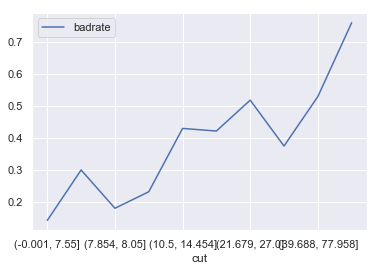

In [79]:
alist = list(set(df_train['fare_qcut']))
badrate = {}
for x in alist:
    
    a = df_train[df_train.fare_qcut == x]
    
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    
    badrate[x] = bad/(bad+good)
f = zip(badrate.keys(),badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
badrate = pd.DataFrame(f)
badrate.columns = pd.Series(['cut','badrate'])
badrate = badrate.sort_values('cut')
print(badrate.head())
badrate.plot('cut','badrate')

In [80]:
#OneHot encoding/独热向量编码 
# category类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 271 to 679
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   label        891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  log_age      891 non-null    float64 
 13  family_size  891 non-null    int64   
 14  tmp          891 non-null    float64 
 15  fare_cut     891 non-null    category
 16  fare_qcut    891 non-null    category
dtypes: category(2), float64(4), int64(6), object(5)
memory usage: 114.5+ KB

In [81]:
embarked_oht = pd.get_dummies(df_train[['Embarked']])
embarked_oht.head()

,Embarked_C,Embarked_Q,Embarked_S
271,0,0,1
597,0,0,1
302,0,0,1
633,0,0,1
277,0,0,1


In [82]:
df_train[['Embarked']]

,Embarked
271,S
597,S
302,S
633,S
277,S
...,...
438,S
341,S
737,C
258,C


In [83]:
fare_qcut_oht = pd.get_dummies(df_train[['fare_qcut']])
fare_qcut_oht.head()

,"fare_qcut_(-0.001, 7.55]","fare_qcut_(7.55, 7.854]","fare_qcut_(7.854, 8.05]","fare_qcut_(8.05, 10.5]","fare_qcut_(10.5, 14.454]","fare_qcut_(14.454, 21.679]","fare_qcut_(21.679, 27.0]","fare_qcut_(27.0, 39.688]","fare_qcut_(39.688, 77.958]","fare_qcut_(77.958, 512.329]"
271,1,0,0,0,0,0,0,0,0,0
597,1,0,0,0,0,0,0,0,0,0
302,1,0,0,0,0,0,0,0,0,0
633,1,0,0,0,0,0,0,0,0,0
277,1,0,0,0,0,0,0,0,0,0


In [85]:
df_train[['fare_qcut']]

,fare_qcut
271,"(-0.001, 7.55]"
597,"(-0.001, 7.55]"
302,"(-0.001, 7.55]"
633,"(-0.001, 7.55]"
277,"(-0.001, 7.55]"
...,...
438,"(77.958, 512.329]"
341,"(77.958, 512.329]"
737,"(77.958, 512.329]"
258,"(77.958, 512.329]"


### 时间型

#### 日期处理

In [86]:
car_sales = pd.read_csv('car_data.csv')
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [87]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date_t  1512 non-null   object 
 1   cnt     1032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [88]:
car_sales.describe()

,cnt
count,1032.000000
mean,1760.124031
std,1153.164214
min,12.000000
25%,1178.750000
50%,1774.000000
75%,2277.750000
max,7226.000000


In [89]:
car_sales['date_t'].dtype

dtype('O')

In [90]:
car_sales.loc[:,'date'] = pd.to_datetime(car_sales['date_t'])
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date_t  1512 non-null   object        
 1   cnt     1032 non-null   float64       
 2   date    1512 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.6+ KB


In [91]:
car_sales.head()

,date_t,cnt,date
0,2012-12-31,NaN,2012-12-31
1,2013-01-01,NaN,2013-01-01
2,2013-01-02,68.0,2013-01-02
3,2013-01-03,36.0,2013-01-03
4,2013-01-04,5565.0,2013-01-04


#### 取出关键时间信息

In [92]:
# 取出几月份
car_sales.loc[:,'month'] = car_sales['date'].dt.month
car_sales.head()

,date_t,cnt,date,month
0,2012-12-31,NaN,2012-12-31,12
1,2013-01-01,NaN,2013-01-01,1
2,2013-01-02,68.0,2013-01-02,1
3,2013-01-03,36.0,2013-01-03,1
4,2013-01-04,5565.0,2013-01-04,1


In [93]:
# 取出来是几号
car_sales.loc[:,'dom'] = car_sales['date'].dt.day

In [94]:
# 取出一年当中的第几天
car_sales.loc[:,'doy'] = car_sales['date'].dt.dayofyear

In [95]:
# 取出星期几
car_sales.loc[:,'dow'] = car_sales['date'].dt.dayofweek

In [96]:
car_sales.head()

,date_t,cnt,date,month,dom,doy,dow
0,2012-12-31,NaN,2012-12-31,12,31,366,0
1,2013-01-01,NaN,2013-01-01,1,1,1,1
2,2013-01-02,68.0,2013-01-02,1,2,2,2
3,2013-01-03,36.0,2013-01-03,1,3,3,3
4,2013-01-04,5565.0,2013-01-04,1,4,4,4


### 文本型

In [105]:
# 
from pyecharts.charts import WordCloud
data=[('python',23),('word',10),('cloud',5)]
mywordcloud=WordCloud()
mywordcloud.add("",data,shape='circle')
#mywordcloud.render() html view
mywordcloud.render_notebook()

https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/

In [106]:
#词袋模型
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    'This is a very good class',
    'students are very very very good',
    'This is the third sentence',
    'Is this the last doc',
    'PS teacher Mei is very very handsome'
]

In [107]:
X = vectorizer.fit_transform(corpus)

In [108]:
vectorizer.get_feature_names()

['are',
 'class',
 'doc',
 'good',
 'handsome',
 'is',
 'last',
 'mei',
 'ps',
 'sentence',
 'students',
 'teacher',
 'the',
 'third',
 'this',
 'very']

In [109]:
X.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2]])

In [110]:
vec = CountVectorizer(ngram_range=(1,3))
X_ngram = vec.fit_transform(corpus)
vec.get_feature_names()

['are',
 'are very',
 'are very very',
 'class',
 'doc',
 'good',
 'good class',
 'handsome',
 'is',
 'is the',
 'is the third',
 'is this',
 'is this the',
 'is very',
 'is very good',
 'is very very',
 'last',
 'last doc',
 'mei',
 'mei is',
 'mei is very',
 'ps',
 'ps teacher',
 'ps teacher mei',
 'sentence',
 'students',
 'students are',
 'students are very',
 'teacher',
 'teacher mei',
 'teacher mei is',
 'the',
 'the last',
 'the last doc',
 'the third',
 'the third sentence',
 'third',
 'third sentence',
 'this',
 'this is',
 'this is the',
 'this is very',
 'this the',
 'this the last',
 'very',
 'very good',
 'very good class',
 'very handsome',
 'very very',
 'very very good',
 'very very handsome',
 'very very very']

In [111]:
X_ngram.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        3, 1, 0, 0, 2, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 1, 1, 0, 1, 0]])

#### TF-IDF

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf_X = tfidf_vec.fit_transform(corpus)
tfidf_vec.get_feature_names()

['are',
 'class',
 'doc',
 'good',
 'handsome',
 'is',
 'last',
 'mei',
 'ps',
 'sentence',
 'students',
 'teacher',
 'the',
 'third',
 'this',
 'very']

In [113]:
tfidf_X.toarray()

array([[0.        , 0.59076079, 0.        , 0.47662209, 0.        ,
        0.33282432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39563939,
        0.39563939],
       [0.38669346, 0.        , 0.        , 0.31198185, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38669346, 0.        , 0.        , 0.        , 0.        ,
        0.77691934],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3047837 , 0.        , 0.        , 0.        , 0.54098887,
        0.        , 0.        , 0.43646642, 0.54098887, 0.36230655,
        0.        ],
       [0.        , 0.        , 0.54098887, 0.        , 0.        ,
        0.3047837 , 0.54098887, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.43646642, 0.        , 0.36230655,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.40450855,
        0.22789306, 0.        , 

#### 组合特征

In [ ]:
# 借助条件去判断获取组合特征
df_train.loc[:,'alone'] = (df_train['SibSp']==0)&(df_train['Parch']==0)
df_train.head()

词云图。  

计算出每一个词的出现的次数（即value的值），作为每一个词的重要程度

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    'This is a very good class',
    'students are very very very good',
    'This is the third sentence',
    'Is this the last doc',
    'teacher Mei is very very handsome'
]
X = vectorizer.fit_transform(corpus)
X.toarray().sum(axis=0) # by column each vocabulary- can use function, simple way

array([1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 6])

In [166]:
def count_exact_match(text_row_list,match_word):
    count=0
    for i in text_row_list.lower().split():
        if match_word==i:
            count+=1
    return count

fre={}
for i in vectorizer.get_feature_names():
    if i not in fre:
        fre[i]=0
    for j in range(len(corpus)):
        fre[i]+=count_exact_match(corpus[j].lower(),i)
        #fre[i]+=corpus[j].lower().count(i) # not exactly match, for example count 'is' twice in 'This' and 'is'

value=list(fre.values())
data=dict(zip(vectorizer.get_feature_names(),value))

In [167]:
list(data.items()) # tuple; prepare for plot data is dict

[('are', 1),
 ('class', 1),
 ('doc', 1),
 ('good', 2),
 ('handsome', 1),
 ('is', 4),
 ('last', 1),
 ('mei', 1),
 ('sentence', 1),
 ('students', 1),
 ('teacher', 1),
 ('the', 2),
 ('third', 1),
 ('this', 3),
 ('very', 6)]

items() 函数返回一个视图对象，其中的字典的键值对是一个列表中的元组。我们可以将它与 list() 函数一起使用，以列表的形式获得最终结果。下面的代码实现了这一点。

d1 = {'x':1,'y':2,'z':3} # dic to tuple 
l1 = list(d1.items())
print(l1)
输出：

[('x', 1), ('y', 2), ('z', 3)]

dic good link:
https://blog.csdn.net/Csuriwolf/article/details/79446210

In [ ]:
#计算完value后即可得到词云图
#wordcloud.add('',vectorizer.get_feature_names(),value,word_size_range=[20,100])
#wordcloud.render_notebook()

In [154]:
data2=list(data.items())

In [155]:
from pyecharts.charts import WordCloud
mywordcloud=WordCloud()
mywordcloud.add("",data2,shape='circle')
#mywordcloud.render() html view
mywordcloud.render_notebook()

In [ ]:
#[corpus[j].count(i) for i in vectorizer.get_feature_names() for j in range(len(corpus)-1)]

In [158]:
def count_exact_match(text_row_list,match_word):
    count=0
    for i in text_row_list.lower().split():
        if match_word==i:
            count+=1
    return count

fre={}
for i in vectorizer.get_feature_names():
    if i not in fre:
        fre[i]=0
    for j in range(len(corpus)):
        fre[i]+=count_exact_match(corpus[j].lower(),i)
        #fre[i]+=corpus[j].lower().count(i) # not exactly match, for example count 'is' twice in 'This' and 'is'

print(fre)
print(fre.keys())
print(list(fre.values()))

    

{'are': 1, 'class': 1, 'doc': 1, 'good': 2, 'handsome': 1, 'is': 4, 'last': 1, 'mei': 1, 'sentence': 1, 'students': 1, 'teacher': 1, 'the': 2, 'third': 1, 'this': 3, 'very': 6}
dict_keys(['are', 'class', 'doc', 'good', 'handsome', 'is', 'last', 'mei', 'sentence', 'students', 'teacher', 'the', 'third', 'this', 'very'])
[1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 6]


In [159]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    'This is a very good class',
    'students are very very very good',
    'This is the third sentence',
    'Is this the last doc',
    'teacher Mei is very very handsome'
]
X = vectorizer.fit_transform(corpus)
X.toarray()
X.toarray().sum(axis=0)

array([1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 6])

In [168]:
list(X.toarray().sum(axis=0))

[1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 6]